<a href="https://colab.research.google.com/github/RAIHANRABBY/A-Machine-Learning/blob/main/student_dropout_system_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebook/Student Dropout System/studendropoutsystem.csv',index_col=False)

FileNotFoundError: ignored

## Feature engineering

In [ ]:
df.rename({'Home Language':'Language','Father Occupation':'F_occu','Mother Occupation':'M_occu', 
           'Number Of Siblings':'N_of_Sib', 'Father Education':'F_edu','Mother Education':'M_edu',
           'School Distance':'S_Dis', 'Means to school':'M_t_School','House Lighting':'H_Light',
           'School Infrustructure':'Scl_infra', 'School Meal per day':'M_por_d','School Cost':'Scl_cost',
           'Family income source':'income_Src','Family Annual income':'A_income', 'Extra Tution':'tution', 
           'Hours of study per day':'Hour_study','Class Label':'Dropout','Attendance Parcentage':'Attended'},axis=1,inplace=True)

In [ ]:
df.columns

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.Dropout.replace('Yes ','Yes',inplace=True)

In [ ]:
df.Dropout.unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:

for col in df.columns:
    if df[col].dtype==np.number:
        continue
    else:
        df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [ ]:
corr=df.corr().round(2)
plt.figure(figsize=(20,10))
plot=sns.heatmap(corr,annot=True)
plt.title('Coorelation')

In [ ]:
x=df.drop('Dropout',axis=1)
y=df['Dropout']

In [ ]:
df.Dropout.unique()

In [ ]:

plt.figure(figsize=(10,6))
plt.title('Number of Dropout')

y.value_counts().plot(kind='bar',color=['green','red'])
plt.legend(title='Dropout')
plt.show()

## train test split

In [ ]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=45)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(xtrain,ytrain)
mutual_info

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=xtrain.columns
mutual_info.sort_values(ascending=False)

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

## Model Implementation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB




In [ ]:
models={
    'RF':RandomForestClassifier(),
'adaBoost':AdaBoostClassifier(),
'GBC':GradientBoostingClassifier(),
'ExtraTree': ExtraTreesClassifier(),
'DT':DecisionTreeClassifier(),
'BNB':BernoulliNB(),
# 'MNB':MultinomialNB(),
# 'GNB':GaussianNB(),
# 'KNN':KNeighborsClassifier(),
# 'SVM':SVC(),
# 'LR':LogisticRegression()
}

In [ ]:
# Training the models 
for k,v in models.items():
  v.fit(xtrain,ytrain)


In [ ]:
pred=models['RF'].predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred)

In [ ]:

for k,v in models.items():
  print(k,'  :  ',v.score(xtrain,ytrain))

In [ ]:
#drowing roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_roc_curve(models,x_dtest,y_dtest):
  pred_d={}
  for k,v in models.items():
    pred_d[k]=v.predict(x_dtest)
  

  rocScore={}
  for k,v in pred_d.items():
    rocScore[k]=roc_auc_score(y_dtest,v)

  fp_tp_d={}
  for k,v in pred_d.items():
    fpr,tpr,_=roc_curve(y_dtest,v)
    fp_tp_d[k]={'fpr':fpr,'tpr':tpr}

  plt.figure(figsize=(12,10))
  titlestyle={'fontsize':25,'fontweight':'medium','color':'blue'}
  plt.title('Before Optimization Roc Curve',**titlestyle)
  for k,v in fp_tp_d.items():
    plt.plot(v['fpr'],v['tpr'],marker='.',label= k+": %.3f"%rocScore[k])
    kwargs={'fontsize':15,'fontweight':'demibold','color':'green'}
    plt.xlabel('False positive Rate',**kwargs)
    plt.ylabel('True POsitive Rate',**kwargs)
    size={'font'}
    plt.legend(fontsize='xx-large')
  plt.savefig(fname='Roc curve.png',format='png',transparent=True,bbox_inches=None, pad_inches=0.1)
  plt.show()

In [ ]:
plot_roc_curve(models,xtest,ytest)

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

In [ ]:
#k fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score = cross_val_score(models['RF'],x,y,cv=10)

In [ ]:
sum(cv_score)/10

# over sampling

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.7)
x_res,y_res=ns.fit_resample(x,y)
print(Counter(y_res))

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ovs=RandomOverSampler(random_state=42)
# x_res,y_res=ovs.fit_resample(x,y)

In [ ]:
xotrain,xotest,yotrain,yotest=train_test_split(x_res,y_res,test_size=.3,random_state=45)

In [ ]:
RF=RandomForestClassifier()
RF.fit(xotrain,yotrain)

In [ ]:
preds=RF.predict(xotest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yotest,preds)

In [ ]:
xtest

In [ ]:
print(classification_report(yotest,preds))

In [ ]:
RF.score(xotest,yotest)

In [ ]:
for k,v in models.items():
  v.fit(xotrain,yotrain)

In [ ]:
for k,v in models.items():
  print(k,'  :  ',v.score(xotrain,yotrain))

In [ ]:
for k,v in models.items():
  print(k,'  :  ',v.score(xotest,yotest))

In [ ]:
plot_roc_curve(models,xotest,yotest)

In [ ]:
testaccuracy={}
from sklearn.metrics import precision_score,recall_score,f1_score
def acuracyTest(model,xtest,ytest,xtrain,ytrain):
  test_accuracy=0
  test_accuracy=model.score(xtest,ytest)
  print('test accuracy: %.2f'%test_accuracy)

  train_accuracy=0
  train_accuracy=model.score(xtrain,ytrain)
  print('train accuracy:%.2f'%train_accuracy)

  pred=model.predict(xtest)

  precision=precision_score(ytest,pred)
  
  recall=recall_score(ytest,pred)

  f1=f1_score(ytest,pred)
  print('precision:%.2f'%precision,'\n','recall:%.2f'%recall,'\n','f1%.2f'%f1)
  cMetrix=confusion_matrix(ytest,pred)
  return {'test':test_accuracy,'train':train_accuracy, 'p':precision,'r':recall,'f1':f1,'confusionM':cMetrix}



In [ ]:
acuracyTest(RF,xotest,yotest,xotrain,yotrain)

In [ ]:
for k,v in models.items():
  print('---------------',k,'-----------------')
  acuracyTest(v,xotest,yotest,xotrain,yotrain)
  print()

## Hyperperameter tuning on selected models

In [ ]:
#Manual Hyperperameter Tuning
RFH=RandomForestClassifier(n_estimators=300,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=10)

In [ ]:
RFH.fit(xotrain,yotrain)

In [ ]:
acuracyTest(RFH,xotest,yotest,xotrain,yotrain)

### Drawing the confusion metrix

In [ ]:
randomCM= {'RF':[[124,   1],[  8,  73]],
          'AdaBoost':[[123,   2],[  3,  78]],
          'GBC':[[124,   1],[  3,  78]],
          'Extra Tree':[[117,8],[14,64]],
          'DT':[[116,   9],[  7,  74]],
          'BernoulliNB':[[103, 22], [ 28, 53]]
          }

In [ ]:

cm=[[124,   1],[  8,  73]]
plt.figure(figsize=(20,20))
x=sns.heatmap(cm,cmap='Greens',annot=True,fmt='d',
              xticklabels=[1,0],yticklabels=[1,0],
              annot_kws={'size': 20, 'rotation': 45},
              square=True,)

plt.show()

<Figure size 1440x720 with 0 Axes>

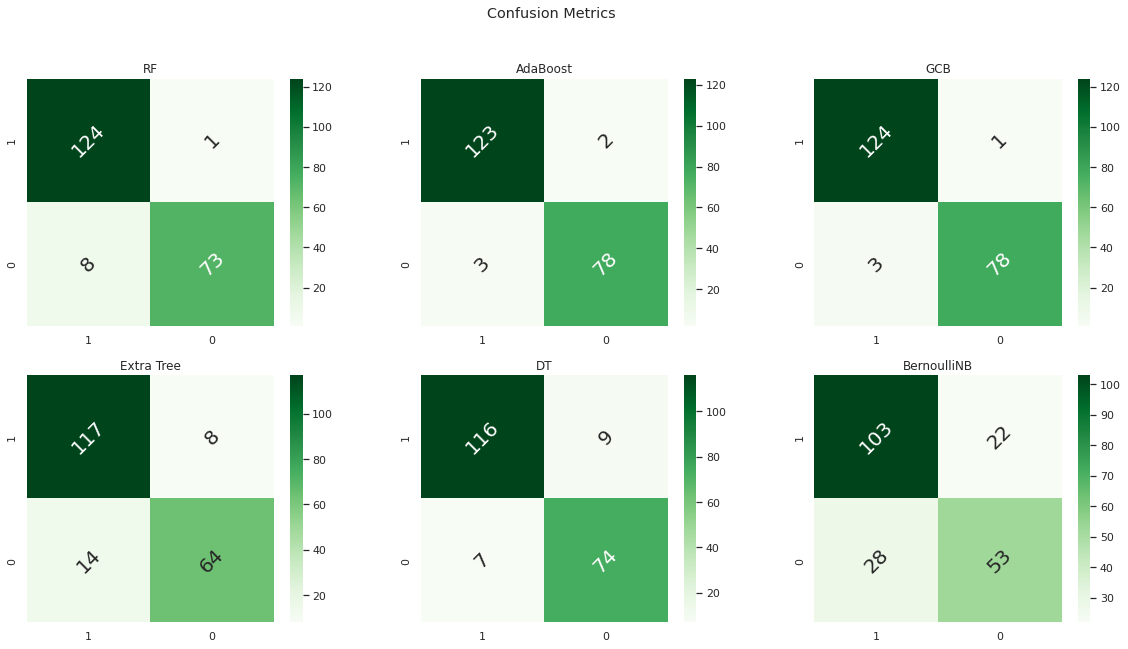

In [ ]:
import seaborn as sns
sns.set(rc={"figure.figsize":(20, 10)})
plt.figure(figsize=(20,10))
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3)
fig.suptitle('Confusion Metrics')
sns.heatmap(randomCM['RF'],cmap='Greens',annot=True,fmt='d',
              xticklabels=[1,0],yticklabels=[1,0],
              annot_kws={'size': 20, 'rotation': 45},
              square=True,ax=ax1).set(title='RF')
sns.heatmap(randomCM['AdaBoost'],cmap='Greens',annot=True,fmt='d',
              xticklabels=[1,0],yticklabels=[1,0],
              annot_kws={'size': 20, 'rotation': 45},
              square=True,ax=ax2).set(title='AdaBoost')
sns.heatmap(randomCM['GBC'],cmap='Greens',annot=True,fmt='d',
              xticklabels=[1,0],yticklabels=[1,0],
              annot_kws={'size': 20, 'rotation': 45},
              square=True,ax=ax3).set(title='GCB')
sns.heatmap(randomCM['Extra Tree'],cmap='Greens',annot=True,fmt='d',
              xticklabels=[1,0],yticklabels=[1,0],
              annot_kws={'size': 20, 'rotation': 45},
              square=True,ax=ax4).set(title='Extra Tree')
sns.heatmap(randomCM['DT'],cmap='Greens',annot=True,fmt='d',
              xticklabels=[1,0],yticklabels=[1,0],
              annot_kws={'size': 20, 'rotation': 45},
              square=True,ax=ax5).set(title='DT')
sns.heatmap(randomCM['BernoulliNB'],cmap='Greens',annot=True,fmt='d',
              xticklabels=[1,0],yticklabels=[1,0],
              annot_kws={'size': 20, 'rotation': 45},
              square=True,ax=ax6).set(title='BernoulliNB')
plt.show()


# randomized search cv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

#for RF
n_estimators =[1855]
max_features=[None]
max_depth = [x for x in range(950,1050)]


random_grid ={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,

    # # 'criterion':['gini','entropy'],
    # 'bootstrap':['False']
    
}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=10,verbose=2, random_state=32,n_jobs=-1)

In [ ]:
rf_randomcv.fit(xotrain,yotrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [950, 951, 952, 953, 954,
                                                      955, 956, 957, 958, 959,
                                                      960, 961, 962, 963, 964,
                                                      965, 966, 967, 968, 969,
                                                      970, 971, 972, 973, 974,
                                                      975, 976, 977, 978, 979, ...],
                                        'max_features': [None],
                                        'n_estimators': [1855]},
                   random_state=32, verbose=2)

In [ ]:
rf_randomcv.best_params_

{'n_estimators': 1855, 'max_features': None, 'max_depth': 972}

In [ ]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=972, max_features=None, n_estimators=1855)

In [ ]:
rf_best_randomgrid=rf_randomcv.best_estimator_

In [ ]:
acuracyTest(rf_randomcv.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.96
train accuracy:1.00
precision:0.99 
 recall:0.90 
 f10.94


{'test': 0.9563106796116505,
 'train': 1.0,
 'p': 0.9864864864864865,
 'r': 0.9012345679012346,
 'f1': 0.9419354838709678,
 'confusionM': array([[124,   1],
        [  8,  73]])}

### grid search cv for the randomforest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

n_estimators =[1855]
max_features=[None]
max_depth = [x for x in range(950,1050)]


random_grid ={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,

    # # 'criterion':['gini','entropy'],
    # 'bootstrap':['False']
    
}
rf_gridcv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=random_grid,cv=3,verbose=2,n_jobs=-1)

In [ ]:
rf_gridcv.fit(xotrain,yotrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [950, 951, 952, 953, 954, 955, 956, 957,
                                       958, 959, 960, 961, 962, 963, 964, 965,
                                       966, 967, 968, 969, 970, 971, 972, 973,
                                       974, 975, 976, 977, 978, 979, ...],
                         'max_features': [None], 'n_estimators': [1855]},
             verbose=2)

In [ ]:
rf_gridcv.best_params_

{'max_depth': 951, 'max_features': None, 'n_estimators': 1855}

In [ ]:
rf_gridcv.best_estimator_

RandomForestClassifier(max_depth=951, max_features=None, n_estimators=1855)

In [ ]:
acuracyTest(rf_gridcv.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.96
train accuracy:1.00
precision:0.99 
 recall:0.90 
 f10.94


{'test': 0.9563106796116505,
 'train': 1.0,
 'p': 0.9864864864864865,
 'r': 0.9012345679012346,
 'f1': 0.9419354838709678,
 'confusionM': array([[124,   1],
        [  8,  73]])}

In [ ]:
1,.1,.01,.001,.0001

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
for i in range(1,6):
  print(10/10**i)

1.0
0.1
0.01
0.001
0.0001


## for ada boost
 Randomized search

In [ ]:
#for the adaboost

from sklearn.model_selection import RandomizedSearchCV

RF=RandomForestClassifier()
gcb=GradientBoostingClassifier()

grid={
   
    'n_estimators':[80],
    'learning_rate':[.1],
    'base_estimator':[ RF,gcb]
    # 'random_state':[1,2,3,4,5,6,7,8,9,10],
    
}
ada_rso=RandomizedSearchCV(estimator=AdaBoostClassifier(),param_distributions=grid,n_jobs=-1,cv=10,scoring='accuracy')
ada_rso.fit(xotrain,yotrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'base_estimator': [RandomForestClassifier(),
                                                           GradientBoostingClassifier()],
                                        'learning_rate': [0.1],
                                        'n_estimators': [80]},
                   scoring='accuracy')

In [ ]:

ada_rso.best_params_

{'n_estimators': 80,
 'learning_rate': 0.1,
 'base_estimator': GradientBoostingClassifier()}

In [ ]:
ada_rso.best_estimator_

AdaBoostClassifier(base_estimator=GradientBoostingClassifier(),
                   learning_rate=0.1, n_estimators=80)

In [ ]:
acuracyTest(ada_rso.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.98
train accuracy:1.00
precision:0.97 
 recall:0.96 
 f10.97


{'test': 0.9757281553398058,
 'train': 0.997907949790795,
 'p': 0.975,
 'r': 0.9629629629629629,
 'f1': 0.9689440993788819,
 'confusionM': array([[123,   2],
        [  3,  78]])}

## Adaboost grid search

In [ ]:
#for the adaboost

DT=DecisionTreeClassifier()


pgrid={
    # 'n_estimators':[10,100,400,500,600,800,1000,1500],
    # 'learning_rate':[1,.1,.2,.3,.4,.5,.6,.7,.8,.9,.01,.001,.0001],
    # 'algorithm':['SAMME','SAMME.R'],
    'base_estimator':[gcb]}
ada_gsCV=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=pgrid,n_jobs=-1,cv=10,scoring='accuracy')
ada_gsCV.fit(xotrain,yotrain)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [GradientBoostingClassifier()]},
             scoring='accuracy')

In [ ]:
ada_gsCV.best_params_

{'base_estimator': GradientBoostingClassifier()}

In [ ]:
ada_gsCV.best_estimator_

AdaBoostClassifier(base_estimator=GradientBoostingClassifier())

In [ ]:
acuracyTest(ada_gsCV.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.97
train accuracy:1.00
precision:0.96 
 recall:0.96 
 f10.96


{'test': 0.970873786407767,
 'train': 1.0,
 'p': 0.9629629629629629,
 'r': 0.9629629629629629,
 'f1': 0.9629629629629629,
 'confusionM': array([[122,   3],
        [  3,  78]])}

GCB optimization

# CV for GBClassifier

## for randomization search 

In [ ]:
param_grid={
    # 'loss':['log_loss','deviance','exponential'],
    'learning_rate':[.1],
    'n_estimators':[400,410,420,430,440,450,460,470,480,490,500],
    'criterion':['friedman_mse','squared_error','mse'],
    'min_samples_split':[5],
    'min_samples_leaf':[1,2,3,5,8,10,15,17,20,25],
    'max_depth':[5],
    'max_features':['auto', 'sqrt', 'log2']


}

In [ ]:
gbc_rcv=RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=param_grid,cv=10,n_jobs=-1,random_state=42)

In [ ]:
# gbc_rcv.fit(xotrain,yotrain)

In [ ]:
# gbc_rcv.best_params_

In [ ]:
# gbc_rcv.best_estimator_

In [ ]:
# gbc=gbc_rcv.best_estimator_

In [ ]:
# acuracyTest(gbc,xotest,yotest,xotrain,yotrain)

## Grid Search CV

In [ ]:
param_grid={
    
    'learning_rate':[.1,1,.01],
    'n_estimators':[100,300,400,500],
    
    # 'min_samples_split':[1,2,5,8,10],
    # 'min_samples_leaf':[1,2,3,5,8],
    # 'max_depth':[1,5,8,10],
    # 'max_features':['auto', 'sqrt', 'log2']


}

In [ ]:
gbc_gcv=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_grid,cv=3,n_jobs=-1)

In [ ]:
# gbc_gcv.fit(xotrain,yotrain)

In [ ]:
# gbc_gcv.best_params_

In [ ]:
# gbc_gcv.best_estimator_

In [ ]:
# acuracyTest(gbc_gcv,xotest,yotest,xotrain,yotrain)

# Extra tree 


## randomizad search cv

In [ ]:
param_grid={
    # 'loss':['log_loss','deviance','exponential'],
    
    'n_estimators':[100,500,800,900,1100,1200,1000,1500],
    'criterion':['gini', 'entropy'],
    'min_samples_split':[1,2,5,8,10],
    'min_samples_leaf':[1,2,3,5,8,10,15,17],
    'max_depth':[1,5,10,20,30,50],
    'max_features':['None', 'sqrt', 'log2']


}

In [ ]:
ex_rcv=RandomizedSearchCV(estimator=ExtraTreesClassifier(),param_distributions=param_grid,n_iter=10,cv=10,n_jobs=-1)

In [ ]:
# ex_rcv.fit(xotrain,yotrain)

In [ ]:
# ex_rcv.best_params_

In [ ]:
# ex_rcv.best_estimator_

In [ ]:
# acuracyTest(ex_rcv.best_estimator_,xotest,yotest,xotrain,yotrain)

## Grid Search Cv

In [ ]:
param_grid={
    # 'loss':['log_loss','deviance','exponential'],
    
    'n_estimators':[1,100,500,1000,1500],
    # # 'criterion':['gini', 'entropy', 'log_loss'],
    # # 'min_samples_split':[1,2,5,8,10],
    # # 'min_samples_leaf':[1,2,3,5,8],
    'max_depth':[1,5,10]
    # 'max_features':['None', 'sqrt', 'log2']


}
ex_gcv=GridSearchCV(estimator=ExtraTreesClassifier(),param_grid=param_grid,cv=3,n_jobs=-1)

In [ ]:
# ex_gcv.fit(xotrain,yotrain)

In [ ]:
# ex_gcv.best_params_

In [ ]:
# ex_gcv.best_estimator_

In [ ]:
# acuracyTest(ex_gcv.best_estimator_,xotest,yotest,xotrain,yotrain)

# Decision Tree test

## randomized search cv

In [ ]:
param_grid={
    # 'criterion':['gini'],
    # 'splitter':['best'],
    
    'min_samples_split':[2,1,3,5,8,9],
    # 'min_samples_leaf':[1],
    # 'max_features':['auto', 'sqrt', 'log2']
    'max_leaf_nodes':[x for x in range(800,900)]


}
dt_rcv=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=param_grid,cv=10,n_jobs=-1)

In [ ]:
# dt_rcv.fit(xotrain,yotrain)

In [ ]:
# dt_rcv.best_params_

In [ ]:
# dt_rcv.best_estimator_

In [ ]:
# acuracyTest(dt_rcv.best_estimator_,xotest,yotest,xotrain,yotrain)

## grid search cv

In [ ]:
param_grid={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    
    'min_samples_split':[15],
    'min_samples_leaf':[3],
   
    'max_leaf_nodes':[x for x in range(1,1000)]


}
dt_gcv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,cv=10,n_jobs=-1)

In [ ]:
dt_gcv.fit(xotrain,yotrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 39960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn(

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...],
                         'min_samples_leaf': [3], 'min_samples_split': [15],
                         'splitter': ['best', 'random']})

In [ ]:
dt_gcv.best_params_

{'criterion': 'gini',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 15,
 'splitter': 'best'}

In [ ]:
dt_gcv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=10, min_samples_leaf=3,
                       min_samples_split=15)

In [ ]:
acuracyTest(dt_gcv.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.93
train accuracy:0.96
precision:0.99 
 recall:0.84 
 f10.91


{'test': 0.9320388349514563,
 'train': 0.9581589958158996,
 'p': 0.9855072463768116,
 'r': 0.8395061728395061,
 'f1': 0.9066666666666666,
 'confusionM': array([[124,   1],
        [ 13,  68]])}

# BernoulliNB

## randomized search

In [ ]:
param={
 'alpha':[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0],   
 'binarize':[.1],
 'fit_prior':[True,False],
 
}
bnb_rcv=RandomizedSearchCV(estimator=BernoulliNB(),param_distributions=param,cv=15,n_jobs=-1)

In [ ]:
bnb_rcv.fit(xotrain,yotrain)

RandomizedSearchCV(cv=15, estimator=BernoulliNB(), n_jobs=-1,
                   param_distributions={'alpha': [1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
                                                  1.7, 1.8, 1.9, 2.0],
                                        'binarize': [0.1],
                                        'fit_prior': [True, False]})

In [ ]:
bnb_rcv.best_params_

{'fit_prior': True, 'binarize': 0.1, 'alpha': 1.8}

In [ ]:
bnb_rcv.best_estimator_

BernoulliNB(alpha=1.8, binarize=0.1)

In [ ]:
acuracyTest(bnb_rcv,xotest,yotest,xotrain,yotrain)

test accuracy: 0.76
train accuracy:0.70
precision:0.71 
 recall:0.65 
 f10.68


{'test': 0.7572815533980582,
 'train': 0.700836820083682,
 'p': 0.7066666666666667,
 'r': 0.654320987654321,
 'f1': 0.6794871794871794,
 'confusionM': array([[103,  22],
        [ 28,  53]])}

## Grid search cv

In [ ]:
param={
 'alpha':[1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.1,1],   
 'binarize':[.01,1,.1,1.2,1.3,1.4,1.5,1.6,1.7,2.0,2.1,.001,.0001],
 'fit_prior':[True,False],
 
}
bnb_gcv=GridSearchCV(estimator=BernoulliNB(),param_grid=param,cv=15,n_jobs=-1)

In [ ]:
bnb_gcv.fit(xotrain,yotrain)

GridSearchCV(cv=15, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.1,
                                   1],
                         'binarize': [0.01, 1, 0.1, 1.2, 1.3, 1.4, 1.5, 1.6,
                                      1.7, 2.0, 2.1, 0.001, 0.0001],
                         'fit_prior': [True, False]})

In [ ]:
bnb_gcv.best_params_

{'alpha': 1.8, 'binarize': 0.01, 'fit_prior': True}

In [ ]:
bnb_gcv.best_estimator_

BernoulliNB(alpha=1.8, binarize=0.01)

In [ ]:
acuracyTest(bnb_gcv.best_estimator_,xotest,yotest,xotrain,yotrain)

test accuracy: 0.76
train accuracy:0.70
precision:0.71 
 recall:0.65 
 f10.68


{'test': 0.7572815533980582,
 'train': 0.700836820083682,
 'p': 0.7066666666666667,
 'r': 0.654320987654321,
 'f1': 0.6794871794871794,
 'confusionM': array([[103,  22],
        [ 28,  53]])}